# Predicting Heart Disease using machine learning

This notebook looks into using various python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone is having a heart disease based on their medical attributes.

We're going to take the following approach:
1. Problem definition.
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease

## 2. Data
> This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. source:https://www.kaggle.com/ronitf/heart-disease-uci

## 3. Evaluation

> We need to get 85% accuracy of the model to pursue the project.

## 4. Features
This is where we get different information about each of the features in our data

**Data dictionary**

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
 * 0: Typical Angina: Chest pain related decrease blood supply to the heart
 * 1: Atypical Angeina: Chest pain not related to heart
 * 2: Non-anginal pain: typically esophagal spasms(non heart related)
 * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
5. chol - serum cholestoral in mg/dl
 * serum = LDL + HDL +.2*triglvcerides
 * above 200 is cause for concern 
6.  fbs - (fasting blood sugar > 120 mg/dl) - (1 = true; 0 = false)
 * '>126' mg/dL signals diabetes
* restecg - resting electrocardiographic results
 * 0: Nothing to note
 * 1: ST-T wave abnormality
  * can range from mild symptoms to severe problems
  * signals non-normal heart beat
 * 2: Possible or definite left ventricular hypertrophy.
  * Enlarged heart's main pumping chamber
* thalach - maximum heart rate achieved
* exangexercise induced angina - (1 = yes; 0 = no)
* oldpeakST - depression induced by exercise relative to rest
* slopethe - slope of the peak exercise ST segment
* canumber of major vessels - (0-3) colored by flourosopy
* thal3 = normal; 6 = fixed defect; 7 = reversable defect
* target - 1 or 0



## Preparing the tools

we're going to use pandas, numpy and Matplotlib for data analysis and manipulation. 

In [1]:
# Importing all the tools we need.

# Regular EDA (exploratory Data analysis) and visualisation libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#To make our plots visible on notebook
%matplotlib inline  

# Models from Scikit-Learn.
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve


## Load the data

In [2]:
df = pd.read_csv('heart-disease.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df.shape # (rows, columns)

(303, 14)

## Exploratory Data Analysis (EDA)

The goal here is to be find out more about the data that we're working with.

1. What questions are we trying to solve?
2. what kind of data do we have and how do we treat different types
3. what's missing from the data and how do we deal with them.
4. Where are the outliers and why should we care about them?
5. How can we add, change or remove features.


In [4]:
 df.tail()
    

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
# How many of the each class
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

**Value Counts of Targets**

* Samples with disease: `165`
* Samples without disease: `138`


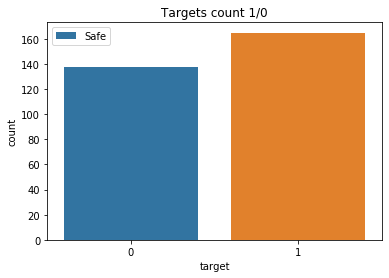

In [6]:
# Visualising the targets
ax = sns.countplot(x='target',data=df);
#df['target'].value_counts().plot(kind='bar',color=['green','red']);
dict1={0:'Safe',1:'danger'}
ax.legend(dict1.values())

plt.title('Targets count 1/0');


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**checking for missing values:**

In [9]:
 df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Heart Disease frequency according to Gender

In [10]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [11]:
#sns.countplot(x='target',hue='sex',data=df);

In [12]:
# compare target column with sex column
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


In [13]:
print(f'Chance of a male having a disease: {((93/207)*100):.2f}%')
print(f'Chance of a female having a disease: {((72/96)*100):.2f}%')

Chance of a male having a disease: 44.93%
Chance of a female having a disease: 75.00%


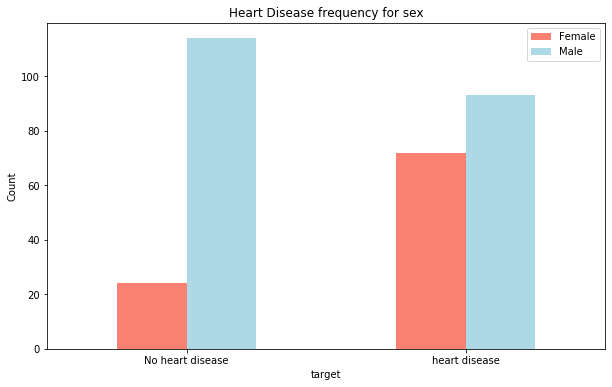

In [14]:
#create a plot of crosstab
pd.crosstab(df.target,df.sex).plot(kind='bar',figsize=(10,6),color=['salmon','lightblue']);
plt.title('Heart Disease frequency for sex');
#plt.xlabel('0 = No heart Disease, 1 = Heart Disease');
plt.ylabel('Count');
plt.legend(['Female','Male']);
plt.xticks([0,1],['No heart disease','heart disease'],rotation=0);

## Age vs. Max Heart Rate for Heart disease

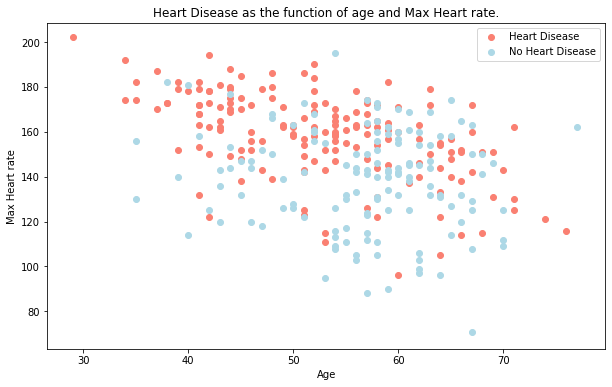

In [15]:
# create another figure
plt.figure(figsize=(10,6))

# scatter with positive values
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],c='salmon');

# scatter with Negative values
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],c='lightblue');

# customizing the plot
plt.title('Heart Disease as the function of age and Max Heart rate.');
plt.xlabel('Age');
plt.ylabel('Max Heart rate');
plt.legend(['Heart Disease','No Heart Disease']);

**Checking the age distribution using histogram for outliers**

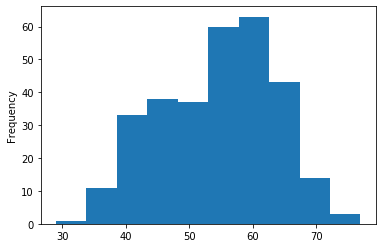

In [16]:
df.age.plot(kind='hist');

### Heart disease Frequncey per Chest pain type
 > cp - chest pain type
 * 0: Typical Angina: Chest pain related decrease blood supply to the heart
 * 1: Atypical Angeina: Chest pain not related to heart
 * 2: Non-anginal pain: typically esophagal spasms(non heart related)
 * 3: Asymptomatic: chest pain not showing signs of disease 

In [17]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


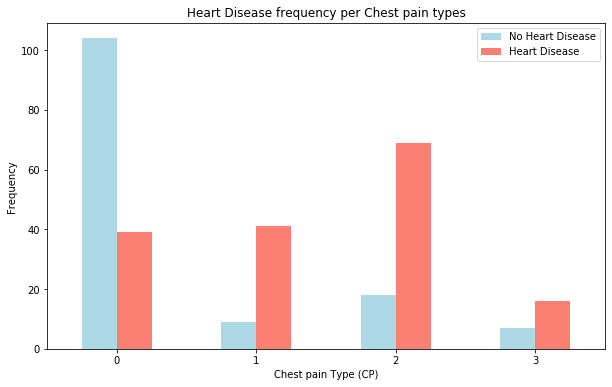

In [18]:
pd.crosstab(df.cp,df.target).plot.bar(color=['lightblue','salmon'],figsize=(10,6));
plt.title('Heart Disease frequency per Chest pain types');
plt.xlabel('Chest pain Type (CP)');
plt.ylabel('Frequency');
plt.legend(['No Heart Disease','Heart Disease']);
plt.yticks(rotation=0);
plt.xticks(rotation=0);

### Correlation Matrix

In [19]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


**Visualizing the correlation matrix:**

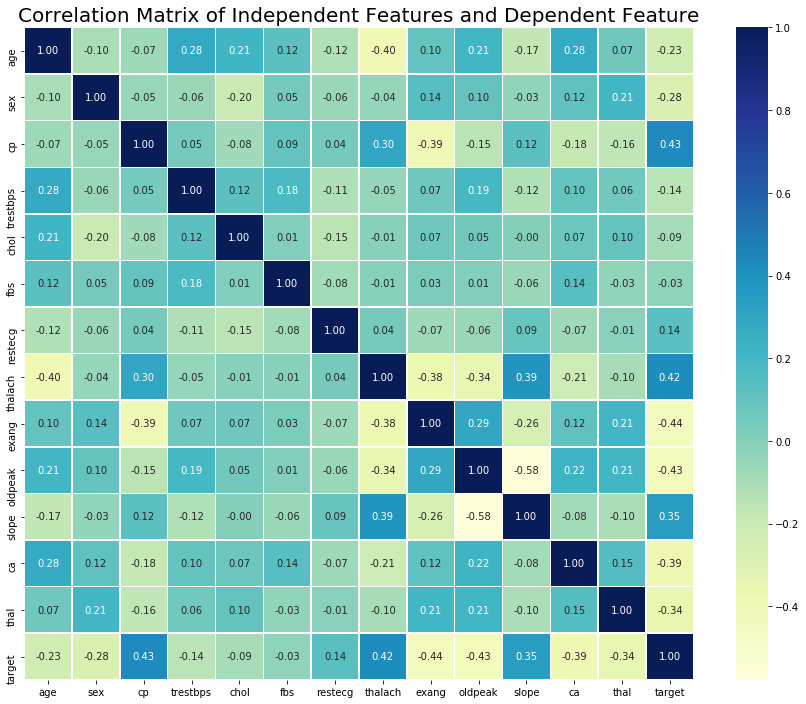

In [20]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,12))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt='.2f',
                 cmap='YlGnBu');
ax.set_title('Correlation Matrix of Independent Features and Dependent Feature',fontsize=20);

## 5. Modelling

In [21]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**Split the data into X and y**

In [22]:
X = df.drop('target',axis=1)
y = df['target']

In [23]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [24]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

**Split the data into training and test sets**

In [25]:
np.random.seed(42)

# split into train and rest set

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [26]:
X_train,len(X_train)

(     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
 132   42    1   1       120   295    0        1      162      0      0.0   
 202   58    1   0       150   270    0        0      111      1      0.8   
 196   46    1   2       150   231    0        1      147      0      3.6   
 75    55    0   1       135   250    0        0      161      0      1.4   
 176   60    1   0       117   230    1        1      160      1      1.4   
 ..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
 188   50    1   2       140   233    0        1      163      0      0.6   
 71    51    1   2        94   227    0        1      154      1      0.0   
 106   69    1   3       160   234    1        0      131      0      0.1   
 270   46    1   0       120   249    0        0      144      0      0.8   
 102   63    0   1       140   195    0        1      179      0      0.0   
 
      slope  ca  thal  
 132      2   0     2  
 202      2   0     3  
 1

In [27]:
y_train,len(y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 242)

Now we've got our data into training and test sets, it's time to build a machine learning model.
As we train the model on training set, we'll test it on test set.

We're going to try 3 different machine learning models:
> 1. Logistic Regression.
> 2. K-Nearest Neighbours Classifier
> 3. Random Forest Classifier


**Put Models in a dictionary:** 

In [28]:

models = {'Logistic Regression':LogisticRegression(),
          'KNN':KNeighborsClassifier(),
          'Random Forest':RandomForestClassifier()}


**Create a function to fit and score models:**

In [29]:
def fit_and_score(models, X_train, X_test,y_train,y_test):
    '''
    Fits and evaluates given machine learing models.
    models: A dictionary of dofferent Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : testing labels
    '''
    # set random seed
    np.random.seed(42)
    # make a dictionary to keep model scores
    model_scores={}
    # Loop through models
    for name, model in models.items():
        #Fit the model to the data
        model.fit(X_train,y_train)
        # Evaluate the model and append its score to the model_scores
        model_scores[name]=model.score(X_test,y_test)
    return model_scores

In [30]:
scores = fit_and_score(models,X_train,X_test,y_train,y_test) 
scores

/Users/nagavedareddy/Desktop/heart-disease-project/env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Model comparision

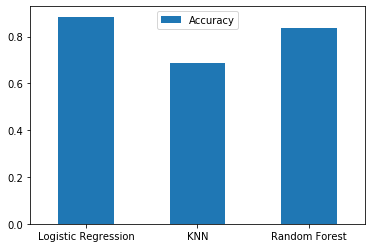

In [31]:
model_compare = pd.DataFrame(data=scores.values(),index=scores.keys(),columns=['Accuracy'])
model_compare.plot.bar();
plt.xticks(rotation=0);

Now we've got our baseline model.. We know a model's first predictions aren't always what we should proceed with.

Let's look at the following:
> * Hyperparameter Tuning
> * Feature importance
> * Confusion matrix
> * Cross-validation
> * Precision
> * Recall
> * F1 score
> * Classification report
> * ROC curve
> * Area under the Curve(AUC)


### Hyperparameter tuning (by hand)

In [32]:
# Let's tune KNN

train_scores=[]
test_scores=[]

# create a list of different values for n_neighbours
neighbours = range(1,21)

# setup KNN instance

knn = KNeighborsClassifier()

# Loop through different n_neighbours
for i in neighbours:
    knn.set_params(n_neighbors=i)
    
    # fit the model to the data
    knn.fit(X_train,y_train)
    
    #update the training scores list
    train_scores.append(knn.score(X_train,y_train))
    
    #update the testing scores list
    test_scores.append(knn.score(X_test,y_test))
    
    

In [33]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [34]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the Test data: 75.41%


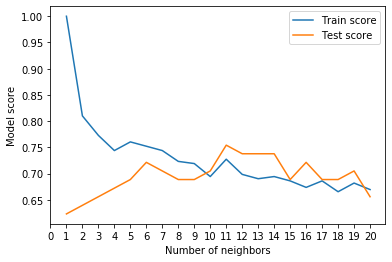

In [35]:
plt.plot(neighbours,train_scores,label='Train score');
plt.plot(neighbours,test_scores,label='Test score');
plt.xlabel('Number of neighbors');
plt.ylabel('Model score');
plt.xticks(np.arange(0,21,1));
plt.legend();

print(f'Maximum KNN score on the Test data: {max(test_scores)*100:.2f}%')

> Due to unsatisfied performance of KNN model inspite of hyperparameter tuning when compared to that of Logistic regression and RandomForest Classifier, we would not consider KNN model

## Hyperparameter tuning with `RandomizedsearchCV`

We're going to tune:
* `LogisticRegression()`
* `RandomForestClassifier()`


using `RandomisedSearchCV()`



Create a Hyperparameter grid for Logistic Regression: 

In [36]:
log_reg_grid =  {'C':np.logspace(-4,4,20),
                 'solver':['liblinear']}



Create a Hyperparameter grid for Randomforest: 

In [37]:
rf_grid = {'n_estimators':np.arange(10,1000,50),
           'max_depth':[None,3,5,10],
           'min_samples_split':np.arange(2,20,2),
           'min_samples_leaf':np.arange(1,20,2)}

Now we've got hyperparameter grids setup for each of our models, let's tune them using RandomizedSearchCV..

In [38]:
# Tune LogisticRegression

np.random.seed(42)

# setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

#Fit random hyperparameter search model for LogisticRegression

rs_log_reg.fit(X_train,y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C':...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [39]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [40]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

We've tuned Logistic Regression, Let's do the same for our RandomForest Classifier   

In [41]:
# Tune RandomForestClassifier

np.random.seed(42)

# setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                               param_distributions=rf_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

#Fit random hyperparameter search model for LogisticRegression

rs_rf.fit(X_train,y_train)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.4min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [42]:
# Find the best parameters of our RandomForest Classifier
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [43]:
# Evaluate our Randomised search RandomForest classifier
rs_rf.score(X_test,y_test)

0.8688524590163934

**We've improved our RandomForestClassifier model accuracy from `83.6%` to `86.8%`**

In [44]:
scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

Still Our Logistic Regression model is on top

## We'll use `GridSearchCV` now for hyperparameter tuning of our LogisticRegression Model

In [45]:
# Different Hyperparameters for our LogisticRegression model
log_reg_grid = {'C': np.logspace(-4,4,30),
                'solver': ['liblinear']}

# setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)
# Fit Grid search Logistic Regression model to our training data
gs_log_reg.fit(X_train,y_train)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.7s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e-04, 1.8...
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5

In [46]:
# check the best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [47]:
# Evaluate the grid search LogisticRegression model
gs_log_reg.score(X_test,y_test)

0.8852459016393442

## Evaluating our tuned machine learning classifier beyond accuracy:
> * ROC curve and AUC curve
> * Confusion matrix
> * Classification report
> * Precision
> * Recall
> * F1-score

To make comparisions and evaluate our trained model, first we need to make predictions.

In [48]:
 # Make predictions with tuned model
    
y_preds = gs_log_reg.predict(X_test)

In [49]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [50]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

**ROC curve and AUC score**

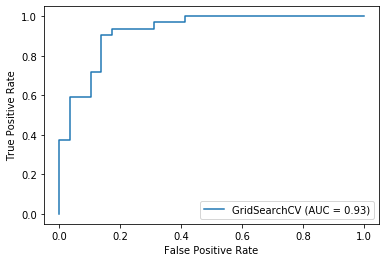

In [51]:
 # Plot ROC curve and calculate and calculate AUC metric
plot_roc_curve(gs_log_reg,X_test,y_test);


**Confusion Matrix**

In [52]:
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


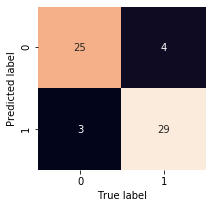

In [53]:
# visualise confusion matrix:
# we create a function for plotting ROC curve given y_test and y_preds
def plot_conf_mat(y_test,y_preds):
    '''
    Plots a nice looking confusion matrix using seaborns heatmap()
    '''
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel('True label')
    plt.ylabel('Predicted label')

plot_conf_mat(y_test,y_preds)


> Now we've got ROC curve, AUC metric and confusion matrix. Now let's get Classification report along with cross-validated precision, recall and f1-score.

**Classification report**

In [54]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## Calculate evaluation metrics using cross-validation

we're going to calculate accuracy, precision, recall and f1-score of our model using cross-validation and to do so we'll be using `cross_val_score()`.

In [55]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [56]:
# create a new classifier with best parameters

clf = LogisticRegression(C=0.20433597178569418,solver='liblinear')


we will create a function that takes input X and y and calculates cross validated scored for us

In [57]:
def cal_cv_scores(clf,X,y,metric):
    '''
    Calculates the cross-validated evaluation metrics of the given classifier as the metric,X and y are provided.
    returns : cross-validated score  
    '''

    score = cross_val_score(clf,
                            X,
                            y,
                            cv=5,
                            scoring=metric )
    return np.mean(score)*100

In [58]:
# cross-validated accuracy
cv_accuracy = cal_cv_scores(clf,X,y,'accuracy')
print(f'Cross-validated accuracy: {cv_accuracy:.2f}%')

Cross-validated accuracy: 84.47%


In [59]:
# cross-validated Precision
cv_precision = cal_cv_scores(clf,X,y,'precision')
print(f'Cross-validated Precision: {cv_precision:.2f}%')

Cross-validated Precision: 82.08%


In [60]:
# cross-validated Recall
cv_recall = cal_cv_scores(clf,X,y,'recall')
print(f'Cross-validated Recall: {cv_recall:.2f}%')

Cross-validated Recall: 92.12%


In [61]:
# cross-validated F1-score
cv_f1 = cal_cv_scores(clf,X,y,'f1')
print(f'Cross-validated F1-score: {cv_f1:.2f}%')

Cross-validated F1-score: 86.73%


In [62]:
cv_metrics = pd.Series([cv_accuracy,cv_precision,cv_recall,cv_f1])
cv_metrics_acc=pd.DataFrame(cv_metrics)
cv_metrics_acc.rename(columns={0:'Score'},inplace=True)
cv_metrics_acc.rename(index={0:'Accuracy',1:'Precision',2:'Recall',3:'F1'},inplace=True)
cv_metrics_acc


,Score
Accuracy,84.469945
Precision,82.079365
Recall,92.121212
F1,86.730080


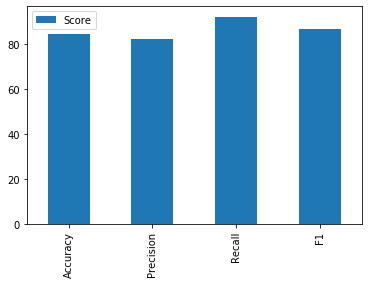

In [63]:
cv_metrics_acc.plot.bar();

## Feature Importance
> "Which features in our data contributed most to the outcomes of our model and how did they contribute?"

Finding feature importance is different for each machine learning model.

In [64]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Let's find the features importance for our Logistic Regression model.

In [65]:
# Fit an instance of Logistic Regression

clf = LogisticRegression(C=0.20433597178569418,
                         solver='liblinear') 
clf.fit(X_train,y_train)


LogisticRegression(C=0.20433597178569418, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [66]:
# check coef_
clf.coef_

array([[ 0.00316727, -0.86044582,  0.66067073, -0.01156993, -0.00166374,
         0.04386131,  0.31275787,  0.02459361, -0.60413038, -0.56862852,
         0.45051617, -0.63609863, -0.67663375]])

In [67]:
# Match coef's of features to columns
features_dict = dict(zip(df.columns,list(clf.coef_[0])))
features_dict

{'age': 0.0031672721856887734,
 'sex': -0.860445816920919,
 'cp': 0.6606707303492849,
 'trestbps': -0.011569930902919925,
 'chol': -0.001663741604035976,
 'fbs': 0.04386130751482091,
 'restecg': 0.3127578715206996,
 'thalach': 0.02459360818122666,
 'exang': -0.6041303799858143,
 'oldpeak': -0.5686285194546157,
 'slope': 0.4505161679452401,
 'ca': -0.6360986316921434,
 'thal': -0.6766337521354281}

**visualize feature importance**

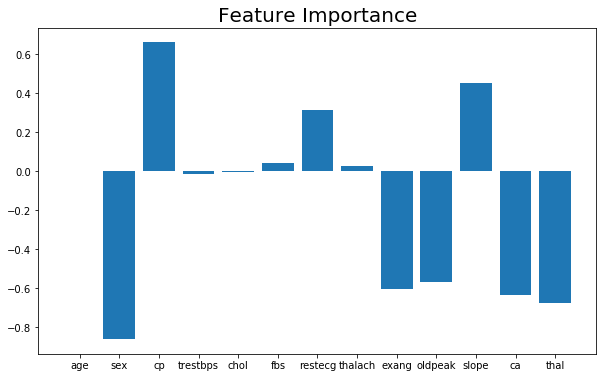

In [74]:
plt.figure(figsize=(10,6));
plt.bar(features_dict.keys(),features_dict.values());
plt.title('Feature Importance',fontsize=20);

# 6. Experimentation

> * Could we collect more data?
> * Could we try a better model? like CatBoost or XGBoost
> * Could we improve our current model? 


## Saving our model


In [78]:
import pickle

pickle.dump(clf,open('heart_disease_classifier.pkl','wb'))